# Exploratory Data Analysis

Explore the data prior to NLP feature extraction and modeling to understand the two chosen subreddits: 
* [r/dating](https://www.reddit.com/r/dating)
* [r/datingoverthirty](https://www.reddit.com/r/datingoverthirty)

Motivation: Understand the difference in how people approach dating at different age groups, based on advice posts in two subreddits focused on different age groups

There is significant user overlap between these two subreddit communities based on user accounts following each.  Per [subredditstats.com](https://subredditstats.com/subreddit-user-overlaps/dating), users following _r/dating_ are 46.2x as likely to post on _r/datingoverthirty_ than the average reddit user.  
For reference, r/patriots and r/bostonceltics have a 92x overlap factor.

### Imports and Data Loading

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment import SentimentIntensityAnalyzer

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
most_recent_extract = '2023-06-11 16:25'
df = pd.read_csv(f'../data/reddit_posts_raw_{most_recent_extract}.csv')

In [8]:
df.shape

(1971, 6)

In [9]:
df.isna().sum()

subreddit             0
id                    0
created_utc           0
title                 0
selftext              0
top_comment_text    156
dtype: int64

> We are pulling new posts from two subreddits.  Some of the newest posts do not have comments yet. "For all of those you sorting by new, we salute you."

### Baseline

In [10]:
df['subreddit'].value_counts(dropna = False, normalize = True)

datingoverthirty    0.506342
dating              0.493658
Name: subreddit, dtype: float64

> Baseline for categorization between subreddits is 50.6%

## Submission and Top Comment Length Profiles

In [11]:
# Post Title
df['title_characters'] = df['title'].str.len()
df['title_words'] = df['title'].str.split().str.len()

#Post Selftext
df['post_characters'] = df['selftext'].str.len()
df['post_words'] = df['selftext'].str.split().str.len()

# Post top comment (upvotes)
df['comment_characters'] = df['top_comment_text'].str.len()
df['comment_words'] = df['top_comment_text'].str.split().str.len()

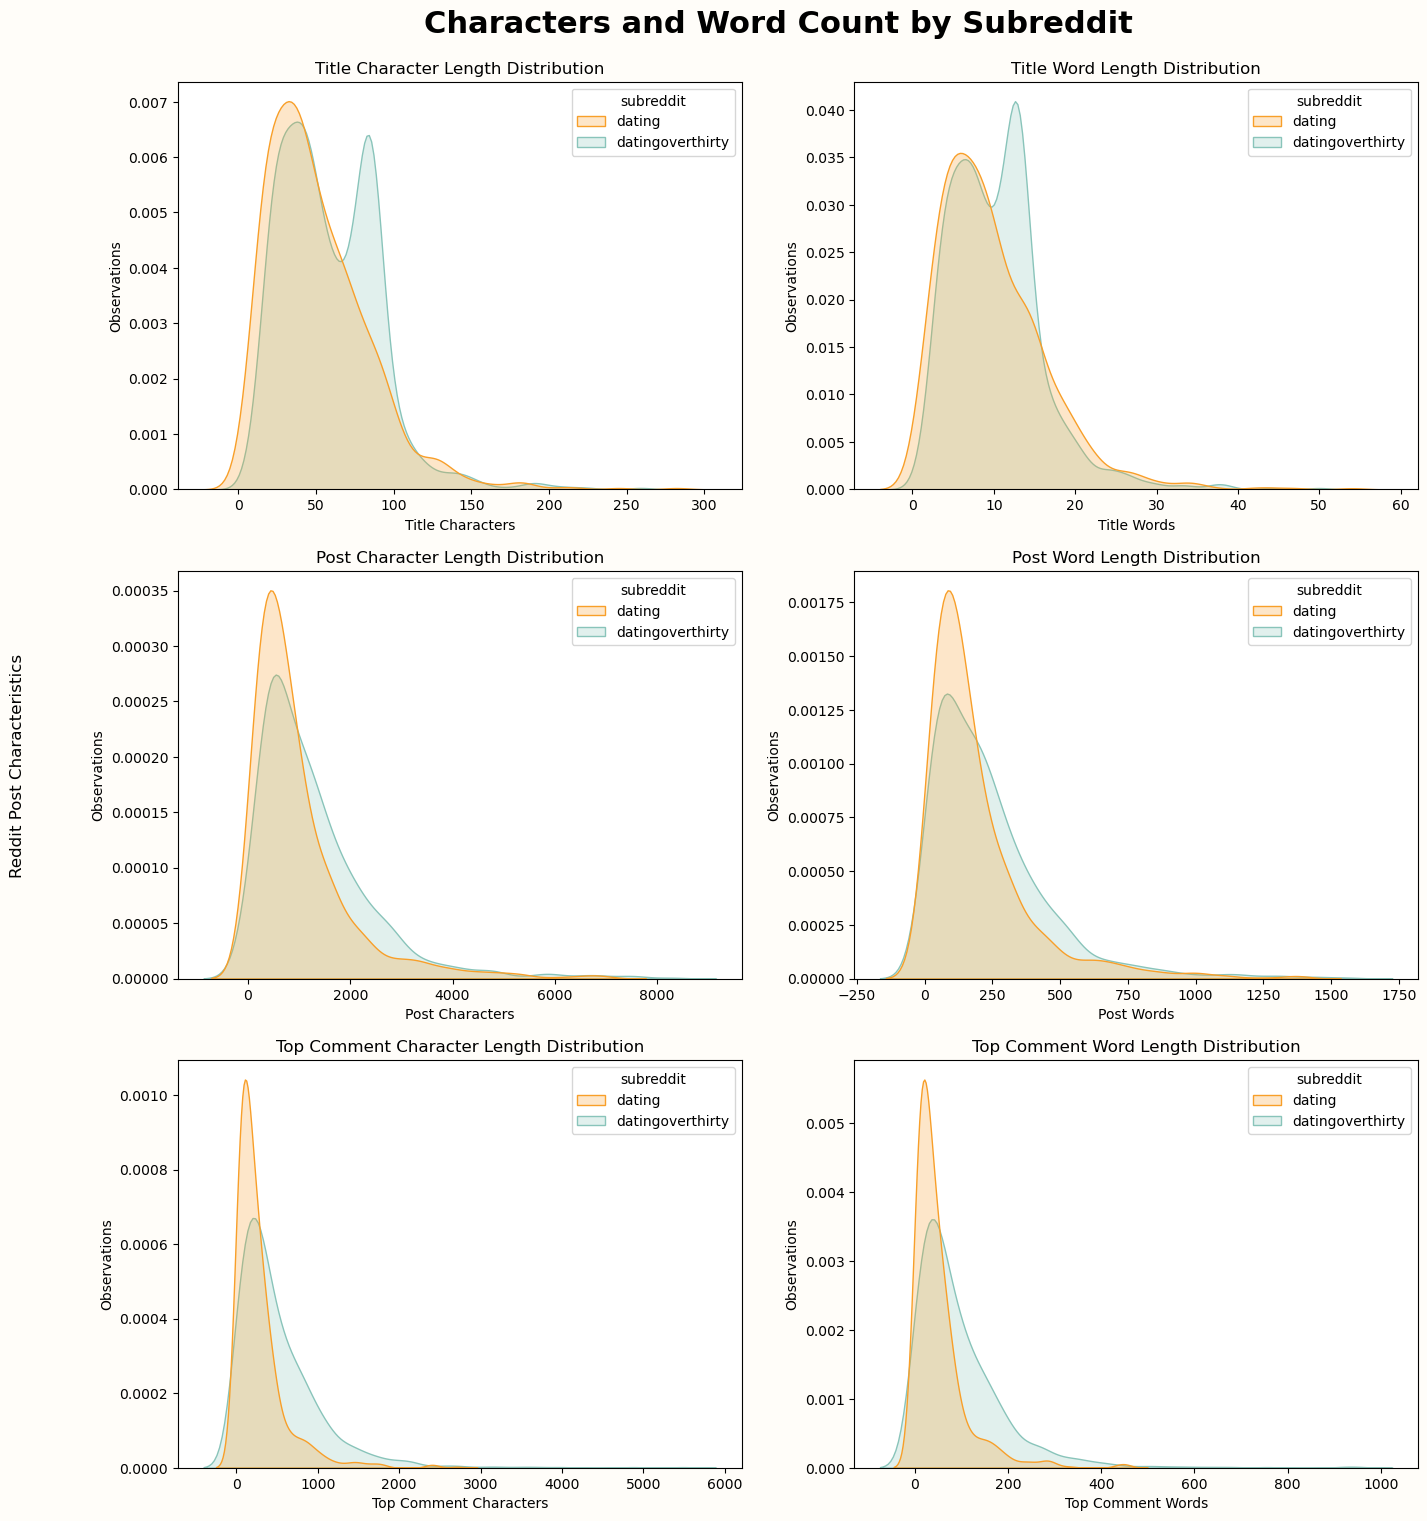

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3,2, sharey=False, figsize = (16,18))
fig.bbox_inches='tight'
fig.suptitle('Characters and Word Count by Subreddit', y = 0.92, size=22, fontweight='bold')
fig.supylabel('Reddit Post Characteristics')
fig.set_facecolor('#fffdf9')
fig.set_edgecolor('#89c4ba')

subreddit_colors = {'dating': '#f89f29', 'datingoverthirty' : '#89c4ba'}

#Title
sns.kdeplot(ax=ax1[0], data = df, x='title_characters', hue='subreddit', palette=subreddit_colors, fill=True)
ax1[0].set_title('Title Character Length Distribution')
ax1[0].set_xlabel('Title Characters')
ax1[0].set_ylabel('Observations')

sns.kdeplot(ax=ax1[1], data = df, x='title_words', hue='subreddit', palette=subreddit_colors, fill=True)
ax1[1].set_title('Title Word Length Distribution')
ax1[1].set_xlabel('Title Words')
ax1[1].set_ylabel('Observations')

#Selftext
subreddit_colors = {'dating': '#f89f29', 'datingoverthirty' : '#89c4ba'}
sns.kdeplot(ax=ax2[0], data = df, x='post_characters', hue='subreddit', palette=subreddit_colors, fill=True)
ax2[0].set_title('Post Character Length Distribution')
ax2[0].set_xlabel('Post Characters')
ax2[0].set_ylabel('Observations')

sns.kdeplot(ax=ax2[1], data = df, x='post_words', hue='subreddit', palette=subreddit_colors, fill=True)
ax2[1].set_title('Post Word Length Distribution')
ax2[1].set_xlabel('Post Words')
ax2[1].set_ylabel('Observations')

#Top Comment
subreddit_colors = {'dating': '#f89f29', 'datingoverthirty' : '#89c4ba'}
sns.kdeplot(ax=ax3[0], data = df, x='comment_characters', hue='subreddit', palette=subreddit_colors, fill=True, )
ax3[0].set_title('Top Comment Character Length Distribution')
ax3[0].set_xlabel('Top Comment Characters')
ax3[0].set_ylabel('Observations')

sns.kdeplot(ax=ax3[1], data = df, x='comment_words', hue='subreddit', palette=subreddit_colors, fill=True)
ax3[1].set_title('Top Comment Word Length Distribution')
ax3[1].set_xlabel('Top Comment Words')
ax3[1].set_ylabel('Observations')

plt.savefig(fname = '../images/character_and_word_count_all.png')
plt.show()

> Bimodal title length for _r/datingoverthirty_ some users are taking more time to post more details in their post titles.
> Selftext and top comment length tend to skew longer for _r/datingoverthirty_ than _r/dating_.  Perhaps better advice based on more details.

In [14]:
# Review Profiles
df[['subreddit', 'title', 'selftext',
       'top_comment_text', 'post_characters', 'post_words', 'title_characters',
       'title_words', 'comment_characters', 'comment_words']].nlargest(10,'title_characters')

,subreddit,title,selftext,top_comment_text,post_characters,post_words,title_characters,title_words,comment_characters,comment_words
53,dating,I (23f) have been wanting to start dating. I'v...,I've never been on a date before. I've wanted ...,Most guys wouldn't care. Some would consider i...,253,44,282,54,171.0,32.0
1713,datingoverthirty,Gfs sent me bumble photos of the guy I’d been ...,33F have been seeing 31 M for the last 5 month...,Time to move on,2218,433,259,50,15.0,4.0
780,dating,How to actually navigate a bar? I've been goin...,"Here's an example of what happened tonight, th...",I can clearly see your problem. You don't want...,3219,623,245,42,329.0,63.0
1647,datingoverthirty,Ever feel guilty for starting to feel like you...,Ended 5-6 months of what felt like it was not ...,I cried everyday for the first week of the bre...,988,193,224,44,983.0,184.0
721,dating,I am worried that a guy I am talking to isn't ...,"I f27, m34 have been talking we get along real...",How would you want him to tell you if the role...,202,39,217,47,129.0,24.0
1067,datingoverthirty,I matched with a woman who became very emotion...,I (37M) matched with a woman (44F) on Okcupid ...,You have a few options. If you want to be rid ...,4814,884,211,38,420.0,81.0
24,dating,"As a boy [18] I have always had heartbreaks, n...",I had always been an introvert my whole life b...,NaN,317,64,206,44,NaN,NaN
1412,datingoverthirty,I (34f) have been encountering a lot of younge...,"I'm a pretty kinky person behind closed doors,...","I know everyone has their thing, but if someon...",844,150,202,37,128.0,26.0
1585,datingoverthirty,How long would you stay away from dating apps ...,Broke up recently like three weeks ago and I’m...,I think a lot of people use the apps and datin...,1133,213,192,33,440.0,88.0
1732,datingoverthirty,We hung out a few times and then he left for a...,I met this guy and all our dates have been inc...,I'll just address one piece of your post - I d...,1062,220,190,38,623.0,110.0


#### Post Context: Quantity and Distribution

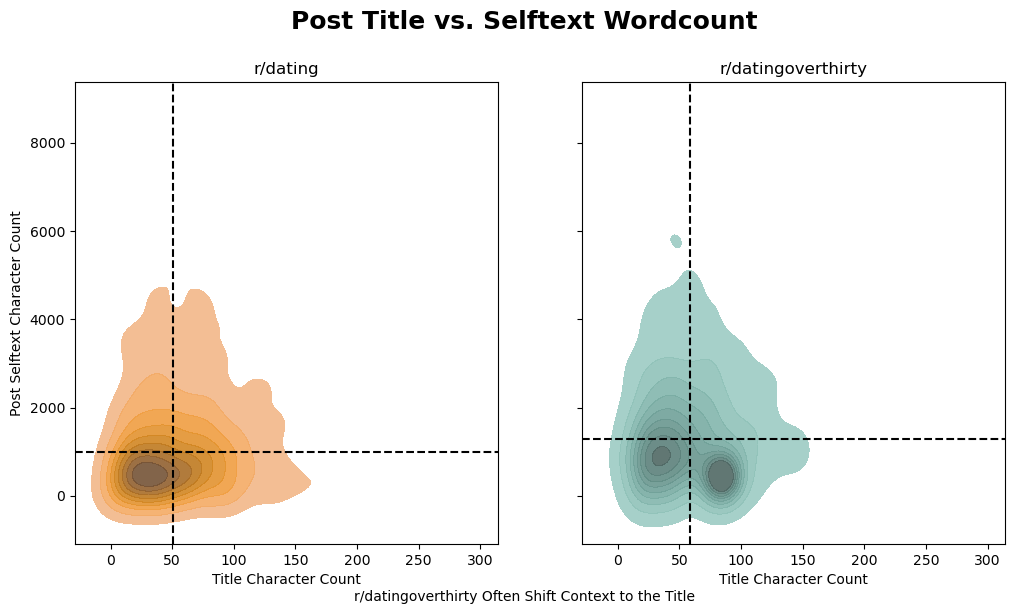

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12,6), sharex = True, sharey = True)
fig.suptitle('Post Title vs. Selftext Wordcount', y = 1, size=18, fontweight='bold')
fig.supxlabel('r/datingoverthirty Often Shift Context to the Title',verticalalignment = 'bottom', size = 10)
sns.kdeplot(ax = ax[0], data = df[df['subreddit']=='dating'], x='title_characters', y = 'post_characters',
                hue='subreddit', palette = subreddit_colors, alpha = 0.9, legend = False, fill = True)
ax[0].set_xlabel("Title Character Count")
ax[0].set_title('r/dating')
ax[0].set_ylabel("Post Selftext Character Count")
ax[0].axhline(df.loc[df['subreddit'] == 'dating', 'post_characters'].mean(), ls = '--', color = 'black')
ax[0].axvline(df.loc[df['subreddit'] == 'dating', 'title_characters'].mean(), ls = '--', color = 'black')

sns.kdeplot(ax = ax[1], data = df[df['subreddit']=='datingoverthirty'], x='title_characters', y = 'post_characters',
                hue='subreddit', palette = subreddit_colors, alpha = 0.9, legend = False, fill = True)
ax[1].set_xlabel("Title Character Count")
ax[1].set_title('r/datingoverthirty')
ax[1].set_ylabel("Post Selftext Character Count")
ax[1].axhline(df.loc[df['subreddit'] == 'datingoverthirty', 'post_characters'].mean(), ls = '--', color = 'black')
ax[1].axvline(df.loc[df['subreddit'] == 'datingoverthirty', 'title_characters'].mean(), ls = '--', color = 'black')
plt.savefig(fname = '../images/post_title_length_vs_selftext_length.png',bbox_inches = 'tight')

### Top Comments: Do more contextualized submissions net more contextualized comments?

In [18]:
df['op_characters'] = df['title_characters'] + df['post_characters']

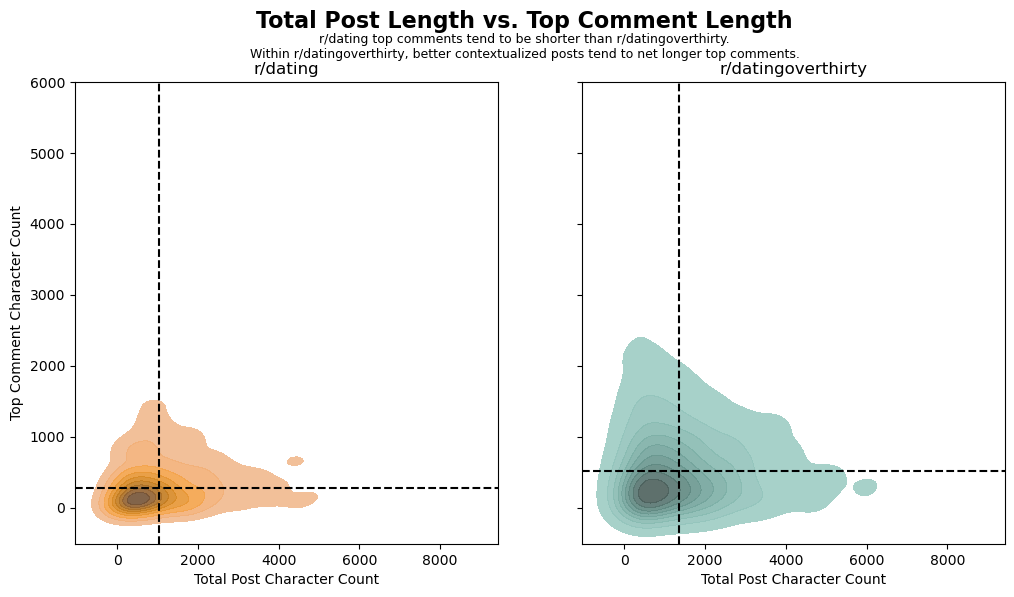

In [19]:
fig, ax = plt.subplots(1,2, figsize=(12,6), sharex = True, sharey = True)
fig.suptitle('Total Post Length vs. Top Comment Length', y = 1, size=16, fontweight='bold')
fig.supxlabel('r/dating top comments tend to be shorter than r/datingoverthirty.\nWithin r/datingoverthirty, better contextualized posts tend to net longer top comments.',y=.915, size = 9)
sns.kdeplot(ax = ax[0], data = df[df['subreddit']=='dating'], x='op_characters', y = 'comment_characters',
                hue='subreddit', palette = subreddit_colors, alpha = 0.9, legend = False, fill = True)
ax[0].set_xlabel("Total Post Character Count")
ax[0].set_title('r/dating')
ax[0].set_ylabel("Top Comment Character Count")
ax[0].axhline(df.loc[df['subreddit']=='dating', 'comment_characters'].mean(), ls = '--', color = 'black')
ax[0].axvline(df.loc[df['subreddit']=='dating', 'op_characters'].mean(), ls = '--', color = 'black')


sns.kdeplot(ax = ax[1], data = df[df['subreddit']=='datingoverthirty'], x='op_characters', y = 'comment_characters',
                hue='subreddit', palette = subreddit_colors, alpha = 0.9, legend = False, fill = True, )
ax[1].set_xlabel("Total Post Character Count")
ax[1].set_title('r/datingoverthirty')
ax[1].set_ylabel("Top Comment Character Count")
ax[1].axhline(df.loc[df['subreddit']=='datingoverthirty', 'comment_characters'].mean(), ls = '--', color = 'black')
ax[1].axvline(df.loc[df['subreddit']=='datingoverthirty', 'op_characters'].mean(), ls = '--', color = 'black')
plt.savefig(fname = '../images/total_post_length_vs_comment_length.png',bbox_inches = 'tight')

### Sentiment

In [22]:
from nltk.sentiment import vader

In [24]:
sa = SentimentIntensityAnalyzer()

In [25]:
df['title_sentiment'] = df['title'].apply(lambda x: sa.polarity_scores(x)['compound']) # cite: 6/12 Breakfast Hour, NLP1
df['self_text_sentiment'] = df['selftext'].apply(lambda x: sa.polarity_scores(x)['compound'])
df['top_comment_sentiment'] = df['top_comment_text'].apply(lambda x: sa.polarity_scores(x)['compound'] if x is not np.nan else np.nan)

In [26]:
df[['title_sentiment', 'self_text_sentiment', 'top_comment_sentiment', 'subreddit']].groupby(by = 'subreddit').mean(numeric_only = True)

,title_sentiment,self_text_sentiment,top_comment_sentiment
subreddit,,,
dating,0.028694,0.440435,0.299511
datingoverthirty,-0.015116,0.576616,0.401982


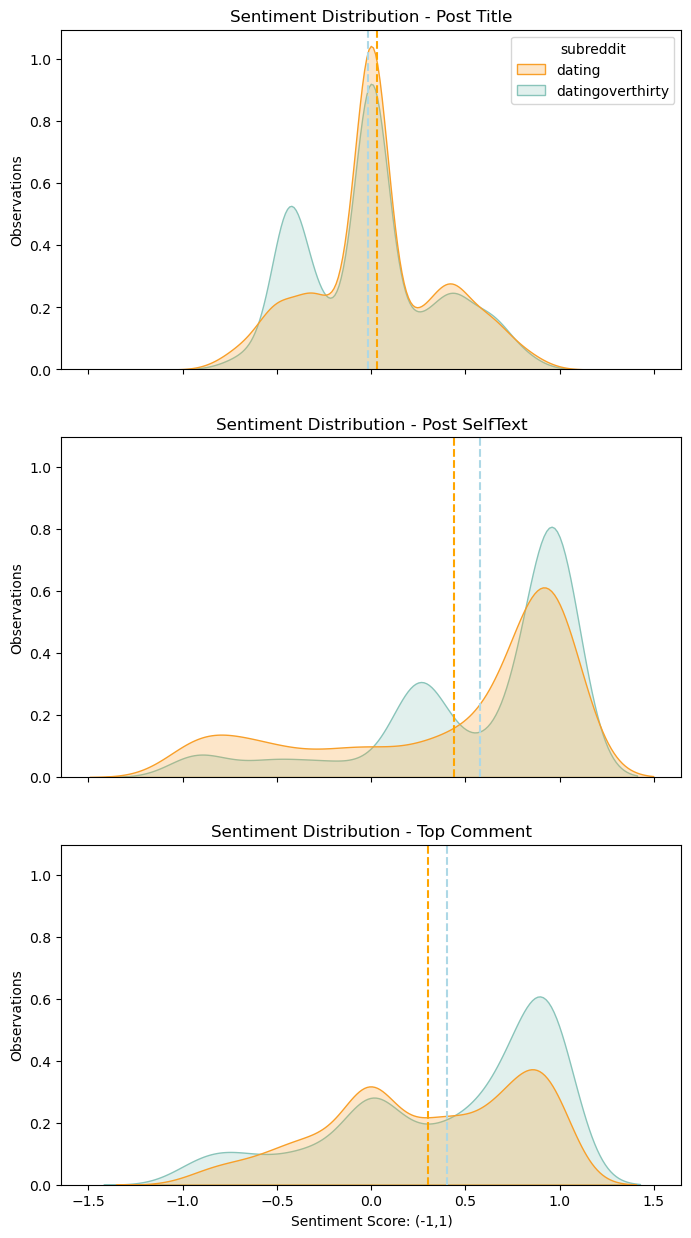

In [27]:
fig, ax = plt.subplots(3,1, figsize = (8, 15), sharex = True, sharey = True)

sns.kdeplot(ax = ax[0], data = df, x = 'title_sentiment', hue = 'subreddit', fill = True, palette=subreddit_colors)
ax[0].set_title("Sentiment Distribution - Post Title")
ax[0].set_xlabel("Sentiment Score: (-1,1)")
ax[0].set_ylabel("Observations")
ax[0].axvline(0.0287, ls = '--', color = 'orange')
ax[0].axvline(-0.0151, ls = '--', color = 'lightblue')

sns.kdeplot(ax = ax[1], data = df, x = 'self_text_sentiment', hue = 'subreddit', fill = True, palette=subreddit_colors, legend = False)
ax[1].set_title("Sentiment Distribution - Post SelfText")
ax[1].set_xlabel("Sentiment Score: (-1,1)")
ax[1].set_ylabel("Observations")
ax[1].axvline(0.4404, ls = '--', color = 'orange')
ax[1].axvline(0.5766, ls = '--', color = 'lightblue')

sns.kdeplot(ax = ax[2], data = df, x = 'top_comment_sentiment', hue = 'subreddit', fill = True, palette=subreddit_colors, legend = False)
ax[2].set_title("Sentiment Distribution - Top Comment")
ax[2].set_xlabel("Sentiment Score: (-1,1)")
ax[2].set_ylabel("Observations")
ax[2].axvline(0.2995, ls = '--', color = 'orange')
ax[2].axvline(0.4019, ls = '--', color = 'lightblue')

plt.savefig('../images/post_and_comment_sentiment_dist.png', dpi = 200, bbox_inches = 'tight');

> Titles tend to be more neutral, with interesting sentiment spikes in both communities: datingoverthirty: negative, dragging the average down; dating: positive.

> Selftext and Top Comments are more positive generally, with notable spikes in positive sentiment in both subreddits, especially in datingoverthirty.  Both are right-skewed.

#### Sentiment Shift: Are top comments more or less supportive by community?

> Why would someone choose to post on one subreddit vs. the other?  There is no age-based gatekeeping, so why the different communities?

One potential is support or advice provided may be substantially different between the communities.  Leveraging a simple shift in sentiment between the post (average of the title and selftext) and the top comment illustrates the relationship between the sentiment of posts and the support provided (and upvoted).

One note: Support comes in many different ways.  Sentiment does not have to be positive to be helpful, illustrated in the compound sentiment scores below for a fake post-response.
* 'I am having a hard time' (-0.1027)
* 'I am sorry to hear it' (-0.0772)

In [28]:
df['comment_title_sentiment_shift'] = df['top_comment_sentiment'] - ((df['title_sentiment'] + df['self_text_sentiment'])/2)

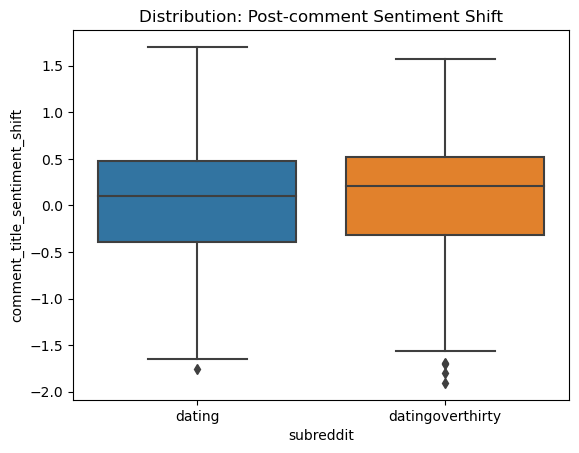

In [29]:
sns.boxplot(data = df, x = 'subreddit', y = 'comment_title_sentiment_shift')
plt.title('Distribution: Post-comment Sentiment Shift');

> We have slightly different distributions.  Better visualizatios below.

In [30]:
df[['comment_title_sentiment_shift', 'subreddit']].groupby(by = 'subreddit').mean(numeric_only = True)

,comment_title_sentiment_shift
subreddit,
dating,0.064898
datingoverthirty,0.121232


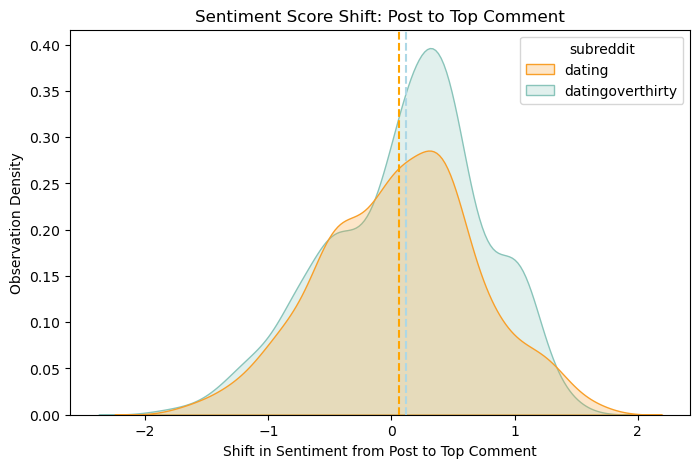

In [31]:
plt.figure(figsize = (8,5))
sns.kdeplot(data = df, x = 'comment_title_sentiment_shift', hue = 'subreddit',
            fill = True, palette=subreddit_colors)
plt.axvline(0.06489, ls = '--', color = 'orange')
plt.axvline(0.12123, ls = '--', color = 'lightblue')
plt.title('Sentiment Score Shift: Post to Top Comment')
plt.xlabel('Shift in Sentiment from Post to Top Comment')
plt.ylabel('Observation Density')
plt.savefig(fname = '../images/sentiment_score_shift.png', dpi = 200, bbox_inches = 'tight');

> The top comment on _r/datingoverthirty_ appears to skew generally positive - and more positive than the original post text.  Both subreddits follow this trend, but the improvement in sentiment of the top comment from the original post (average of title and selftext) is twice as prevalent on r/datingoverthirty.